# Travel Planner Based on Currency Conversion Risk

**Project Goal:** Create a travel planning tool that will allow the user to select a set of countries they would like to travel to and a travel timeframe (3,6,12 months). The tool will analyze historical Forex data and predict the country that will have the most favorable currency within the given travel timeframe.

**The tool will:** Check Forex volatility as barometer for travel decisions Use historical forex data (up to 2 years) 3 - 6 - 12 months predictive outlook using Monte Carlo and other algorithms Produce graphs, risk graphs, value graphs, Variables - currency / country, traveling times (3-6-12 months)


### Import Library

In [1]:
import os
import requests
import pandas as pd
import pandas_datareader as pdr

from pandas_datareader import data as wb
import seaborn as sns

from dotenv import load_dotenv
import numpy as np
%matplotlib inline
import json
from forex_python.converter import CurrencyRates
import datetime as dt
from countryinfo import CountryInfo

import plotly.express as px
from pathlib import Path
#Interactive Plot 
import plotly.offline as pyo
#Candlestick Chart
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
load_dotenv()

# Set up API credentials

# Set Alpha Vantage API key 
alpha_vantage_api_key = os.getenv("ALPHA_VANTAGE_API")

# Verify that Alpha Vantage key was correctly loaded
print(f"Alpha Vantage Key type: {type(alpha_vantage_api_key)}")


# Set the Mapbox API key
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)
# Verify that Mapbox API key was correctly loaded
print(f"Mapbox Key type: {type(map_box_api)}")

Alpha Vantage Key type: <class 'str'>
Mapbox Key type: <class 'str'>


### Country 1

In [3]:
name = (input("What Country are you interested in traveling to? "))
country_name = CountryInfo(name).name()
country_border= CountryInfo(name).borders()
country_capital= CountryInfo(name).capital()
country_currency = CountryInfo(name).currencies()
country_timezone = CountryInfo(name).timezones()
country_wiki = CountryInfo(name).wiki()
country_info = print(f"Country name: {country_name}", '\n'
                      f"Country Capital: {country_capital}", '\n'
                      f"Country Border: {country_border}", '\n' 
                      f"Country Currency: {country_currency}", '\n' 
                      f"Country Timezone: {country_timezone}", '\n'
                      f"Country Wiki: {country_wiki}")

country_info




What Country are you interested in traveling to?  Italy


Country name: italy 
Country Capital: Rome 
Country Border: ['AUT', 'FRA', 'SMR', 'SVN', 'CHE', 'VAT'] 
Country Currency: ['EUR'] 
Country Timezone: ['UTC+01:00'] 
Country Wiki: http://en.wikipedia.org/wiki/italy


### Country 2

In [4]:
name_2 = (input("What Country are you interested in traveling to? "))
country_name_2 = CountryInfo(name_2).name()
country_border_2= CountryInfo(name_2).borders()
country_capital_2= CountryInfo(name_2).capital()
country_currency_2 = CountryInfo(name_2).currencies()
country_timezone_2 = CountryInfo(name_2).timezones()
country_wiki_2 = CountryInfo(name_2).wiki()
country_info_2 = print(f"Country name: {country_name_2}", '\n'
                      f"Country Capital: {country_capital_2}", '\n'
                      f"Country Border: {country_border_2}", '\n' 
                      f"Country Currency: {country_currency_2}", '\n' 
                      f"Country Timezone: {country_timezone_2}", '\n'
                      f"Country Wiki: {country_wiki_2}")

country_info_2

What Country are you interested in traveling to?  Japan


Country name: japan 
Country Capital: Tokyo 
Country Border: [] 
Country Currency: ['JPY'] 
Country Timezone: ['UTC+09:00'] 
Country Wiki: http://en.wikipedia.org/wiki/japan


### Country 3

In [5]:
name_3 = (input("What Country are you interested in traveling to? "))
country_name_3 = CountryInfo(name_3).name()
country_border_3= CountryInfo(name_3).borders()
country_capital_3= CountryInfo(name_3).capital()
country_currency_3 = CountryInfo(name_3).currencies()
country_timezone_3 = CountryInfo(name_3).timezones()
country_wiki_3 = CountryInfo(name_3).wiki()
country_info_3 = print(f"Country name: {country_name_3}", '\n'
                      f"Country Capital: {country_capital_3}", '\n'
                      f"Country Border: {country_border_3}", '\n' 
                      f"Country Currency: {country_currency_3}", '\n' 
                      f"Country Timezone: {country_timezone_3}", '\n'
                      f"Country Wiki: {country_wiki_3}")

country_info_3

What Country are you interested in traveling to?  australia


Country name: australia 
Country Capital: Canberra 
Country Border: [] 
Country Currency: ['AUD'] 
Country Timezone: ['UTC+05:00', 'UTC+06:30', 'UTC+07:00', 'UTC+08:00', 'UTC+09:30', 'UTC+10:00', 'UTC+10:30', 'UTC+11:30'] 
Country Wiki: http://en.wikipedia.org/wiki/australia


In [6]:
#country Currency 1
pair = country_currency[0].strip("''")
forex_pair = pair + "USD"

In [7]:
#Country Currency 2
pair_2 = country_currency_2[0].strip("''")
forex_pair_2 = pair_2 + "USD"

In [8]:
#Country Currency 3
pair_3 = country_currency_3[0].strip("''")
forex_pair_3 = pair_3 + "USD"

In [9]:
# forex_pair = input("Enter the forex pair: ")

# Currency 1
time_series = pdr.av.time_series.AVTimeSeriesReader(forex_pair, api_key='alpha_vantage_api_key')
forex = time_series.read()
forex.index = pd.to_datetime(forex.index, format='%Y-%m-%d')
Forex = forex

In [10]:
# Currency 2
time_series_2 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_2, api_key='alpha_vantage_api_key')
forex_2 = time_series_2.read()
forex_2.index = pd.to_datetime(forex_2.index, format='%Y-%m-%d')
Forex_2 = forex_2
forex_2

open    high     low   close  volume
2014-11-24  0.0085  0.0085  0.0084  0.0084       0
2014-11-25  0.0084  0.0085  0.0084  0.0085       0
2014-11-26  0.0085  0.0085  0.0085  0.0085       0
2014-11-27  0.0085  0.0085  0.0084  0.0085       0
2014-11-28  0.0085  0.0085  0.0084  0.0084       0
...            ...     ...     ...     ...     ...
2022-04-18  0.0079  0.0079  0.0079  0.0079       0
2022-04-19  0.0079  0.0079  0.0077  0.0077       0
2022-04-20  0.0077  0.0078  0.0077  0.0078       0
2022-04-21  0.0078  0.0078  0.0078  0.0078       0
2022-04-22  0.0078  0.0078  0.0077  0.0078       0

[1935 rows x 5 columns]

In [11]:
# Currency 3
time_series_3 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_3, api_key='alpha_vantage_api_key')
forex_3 = time_series_3.read()
forex_3.index = pd.to_datetime(forex_3.index, format='%Y-%m-%d')
Forex_3 = forex_3
forex_3

open    high     low   close  volume
2003-02-24  0.5964  0.6064  0.5959  0.6054       0
2003-02-25  0.6055  0.6083  0.6038  0.6055       0
2003-02-26  0.6055  0.6077  0.6035  0.6075       0
2003-02-27  0.6074  0.6090  0.6045  0.6049       0
2003-02-28  0.6056  0.6084  0.6029  0.6082       0
...            ...     ...     ...     ...     ...
2022-04-18  0.7390  0.7403  0.7339  0.7351       0
2022-04-19  0.7350  0.7400  0.7342  0.7375       0
2022-04-20  0.7375  0.7458  0.7369  0.7450       0
2022-04-21  0.7450  0.7458  0.7362  0.7372       0
2022-04-22  0.7361  0.7369  0.7231  0.7237       0

[5000 rows x 5 columns]

In [12]:
forex_close = Forex.drop(columns=['volume', 'open', 'high', 'low'])

In [13]:
forex_2_close = Forex_2.drop(columns=['volume', 'open', 'high', 'low'])

In [14]:
forex_3_close = Forex_3.drop(columns=['volume', 'open', 'high', 'low'])

In [15]:
joined_forex = pd.concat([forex_close, forex_2_close, forex_3_close], axis="columns", join="inner", keys=[f'{forex_pair}',f'{forex_pair_2}',f'{forex_pair_3}'])
joined_forex

EURUSD  JPYUSD  AUDUSD
             close   close   close
2014-11-24  1.2438  0.0084  0.8612
2014-11-25  1.2473  0.0085  0.8532
2014-11-26  1.2507  0.0085  0.8538
2014-11-27  1.2458  0.0085  0.8522
2014-11-28  1.2451  0.0084  0.8502
...            ...     ...     ...
2022-04-18  1.0778  0.0079  0.7351
2022-04-19  1.0788  0.0077  0.7375
2022-04-20  1.0851  0.0078  0.7450
2022-04-21  1.0835  0.0078  0.7372
2022-04-22  1.0794  0.0078  0.7237

[1935 rows x 3 columns]

In [16]:
# Re name columns 

joined_forex_renamed = joined_forex.rename(columns={"close": f"{forex_pair}", "close": f"{forex_pair_2}", "close": f"{forex_pair_3}"})
joined_forex_renamed

EURUSD  JPYUSD  AUDUSD
            AUDUSD  AUDUSD  AUDUSD
2014-11-24  1.2438  0.0084  0.8612
2014-11-25  1.2473  0.0085  0.8532
2014-11-26  1.2507  0.0085  0.8538
2014-11-27  1.2458  0.0085  0.8522
2014-11-28  1.2451  0.0084  0.8502
...            ...     ...     ...
2022-04-18  1.0778  0.0079  0.7351
2022-04-19  1.0788  0.0077  0.7375
2022-04-20  1.0851  0.0078  0.7450
2022-04-21  1.0835  0.0078  0.7372
2022-04-22  1.0794  0.0078  0.7237

[1935 rows x 3 columns]

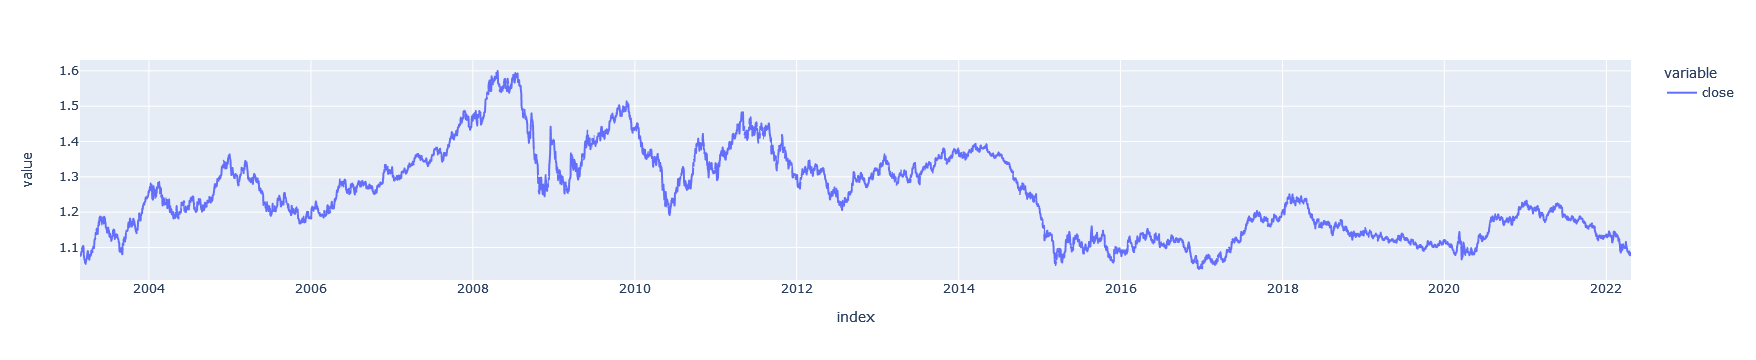

In [17]:
# plotting the opening and closing value 
forex[['close']].plot()



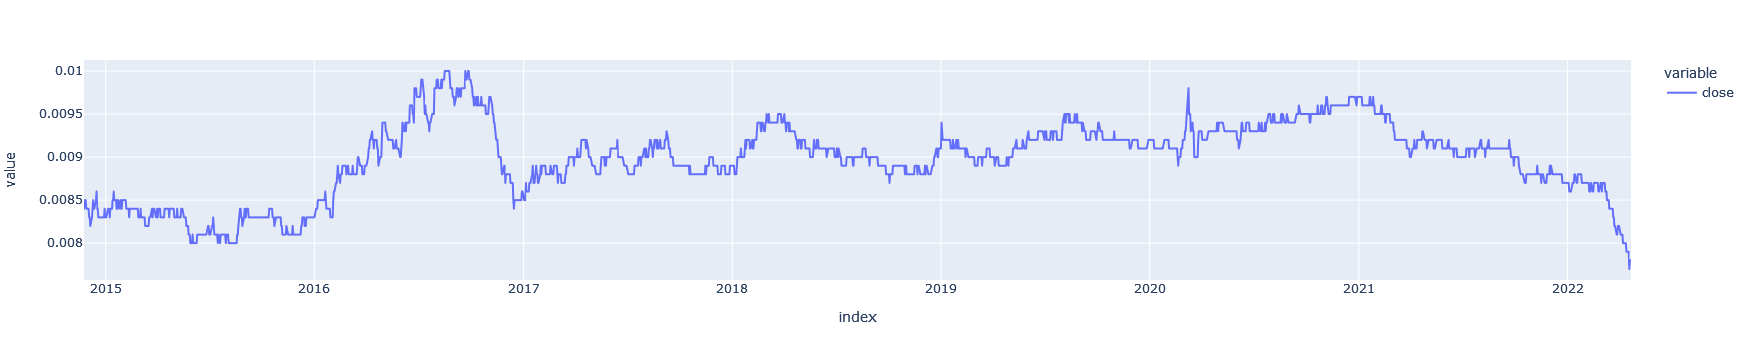

In [18]:
# plotting the opening and closing value of country currency 2
forex_2[['close']].plot()


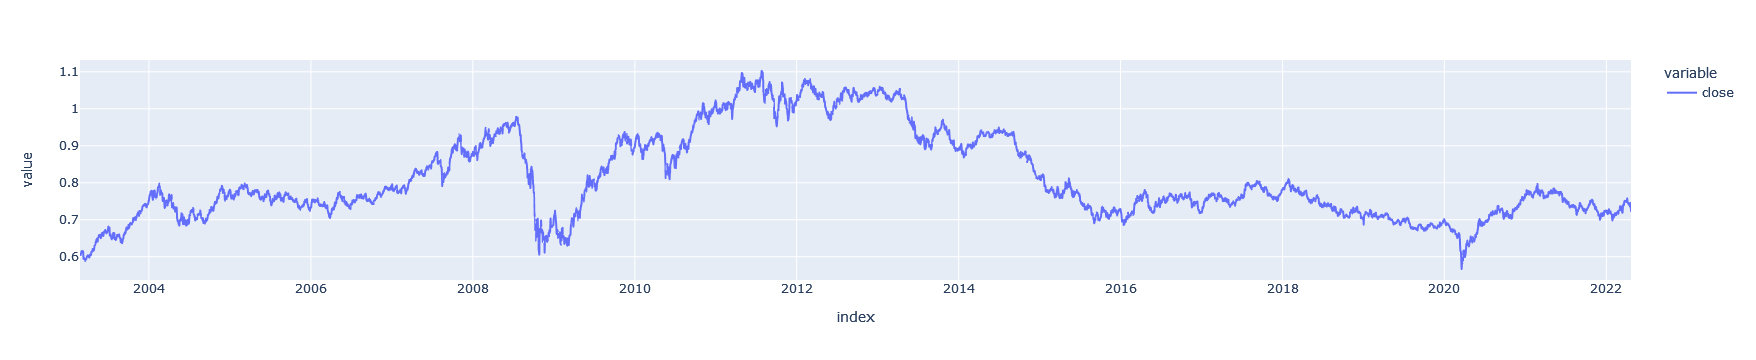

In [19]:
# plotting the opening and closing value of country currency 3
forex_3[['close']].plot()


In [20]:
forex_stats = forex.describe()
forex_stats

open         high          low        close  volume
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.0
mean      1.249035     1.254410     1.243603     1.249023     0.0
std       0.120297     0.121109     0.119448     0.120293     0.0
min       1.039000     1.041800     1.033900     1.039000     0.0
25%       1.140075     1.144475     1.135500     1.139900     0.0
50%       1.233350     1.238800     1.227800     1.233250     0.0
75%       1.335725     1.340625     1.329000     1.335825     0.0
max       1.599600     1.603500     1.586600     1.599600     0.0

In [21]:
forex_stats_2 = forex_2.describe()
forex_stats_2

open         high          low        close  volume
count  1935.000000  1935.000000  1935.000000  1935.000000  1935.0
mean      0.008983     0.009018     0.008953     0.008984     0.0
std       0.000430     0.000431     0.000429     0.000430     0.0
min       0.007700     0.007800     0.007700     0.007700     0.0
25%       0.008800     0.008800     0.008800     0.008800     0.0
50%       0.009000     0.009100     0.009000     0.009000     0.0
75%       0.009250     0.009300     0.009200     0.009250     0.0
max       0.010000     0.010000     0.010000     0.010000     0.0

In [22]:
forex_stats_3 = forex_3.describe()
forex_stats_3

open         high          low        close  volume
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.0
mean      0.810521     0.814957     0.805912     0.810535     0.0
std       0.117421     0.117798     0.116930     0.117404     0.0
min       0.566700     0.584500     0.550600     0.566900     0.0
25%       0.726175     0.729900     0.722200     0.726075     0.0
50%       0.768300     0.772300     0.764500     0.768400     0.0
75%       0.901350     0.906625     0.895350     0.901350     0.0
max       1.102200     1.107800     1.097400     1.102200     0.0

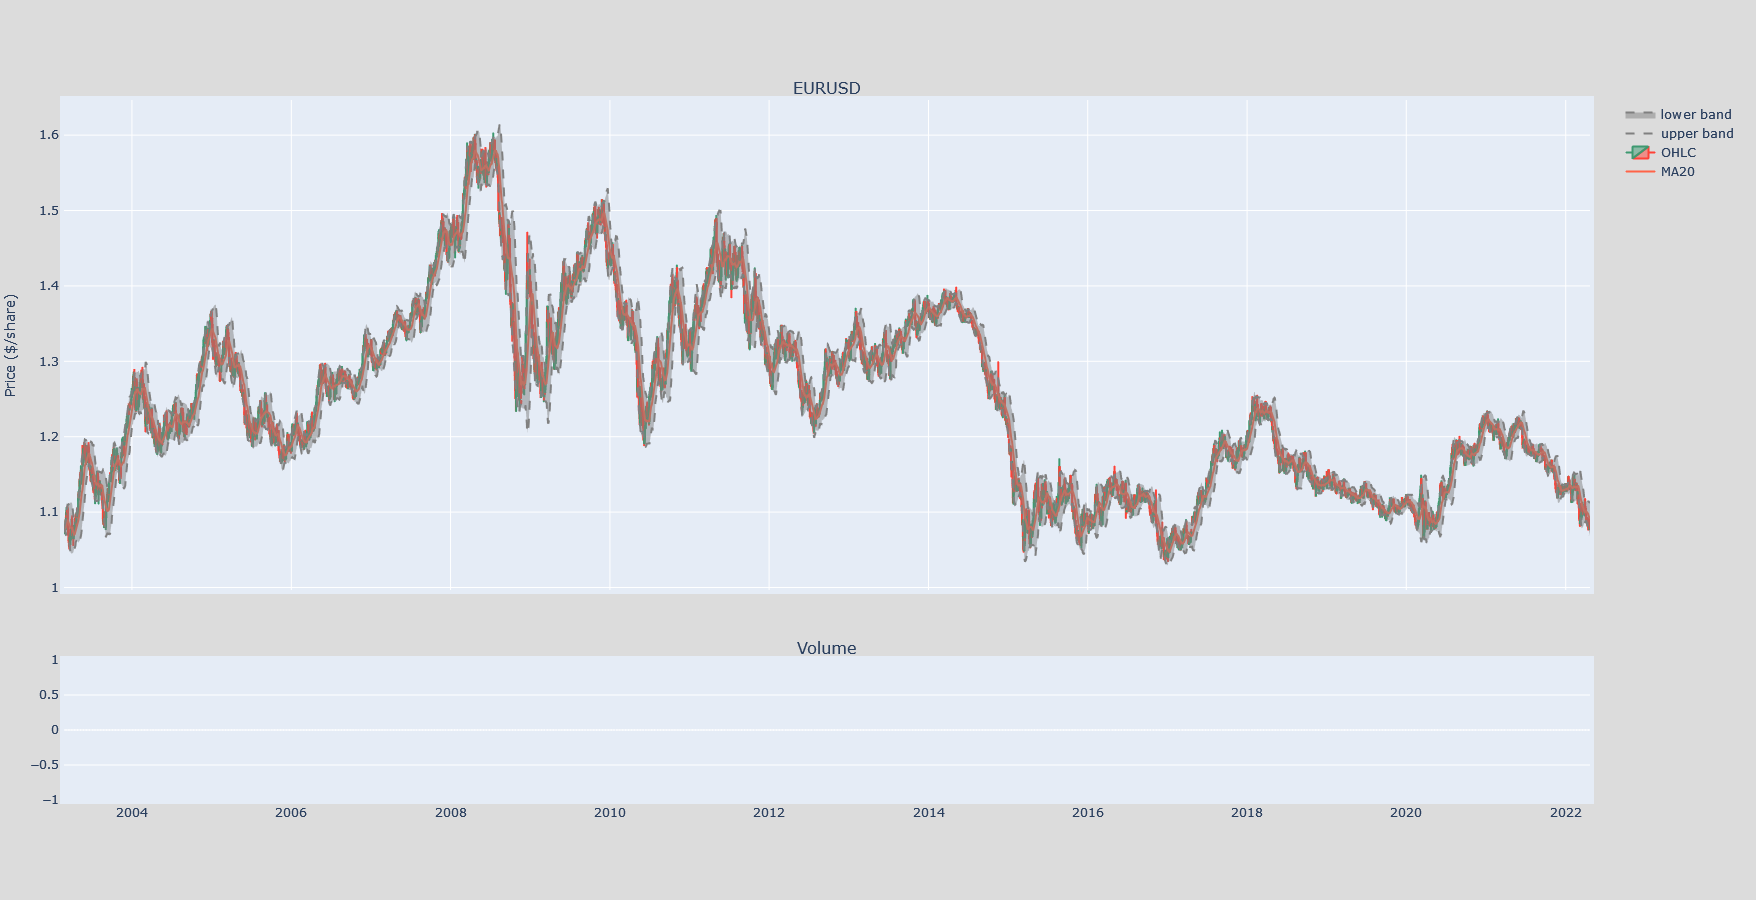

In [23]:
# Set moving Average and STD
forex['MA20'] = forex['close'].rolling(window=20, min_periods=0).mean()
forex['std'] = forex['close'].rolling(window=20, min_periods=0).std(ddof = 0)

# set fig
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair, 'Volume'), 
               row_width=[0.2, 0.7])



# Volume
fig.add_trace(go.Bar(x=forex.index, y=forex['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
fig.add_trace(go.Scatter(x=forex.index, y=forex["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
fig.add_trace(go.Candlestick(x=forex.index, open=forex["open"], high=forex["high"],
                low=forex["low"], close=forex["close"], name="OHLC"), 
                row=1, col=1)


# Create a Bollinger Band

# Upper Bound
fig.add_trace(go.Scatter(x=forex.index, 
                         y=forex["MA20"] + (forex['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x=forex.index, 
                         y=forex["MA20"] - (forex['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 1, col = 1)


fig.update_layout(
#    title= f'{forex_pair} Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=900,
    height=900,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='gainsboro'
    
)
# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()

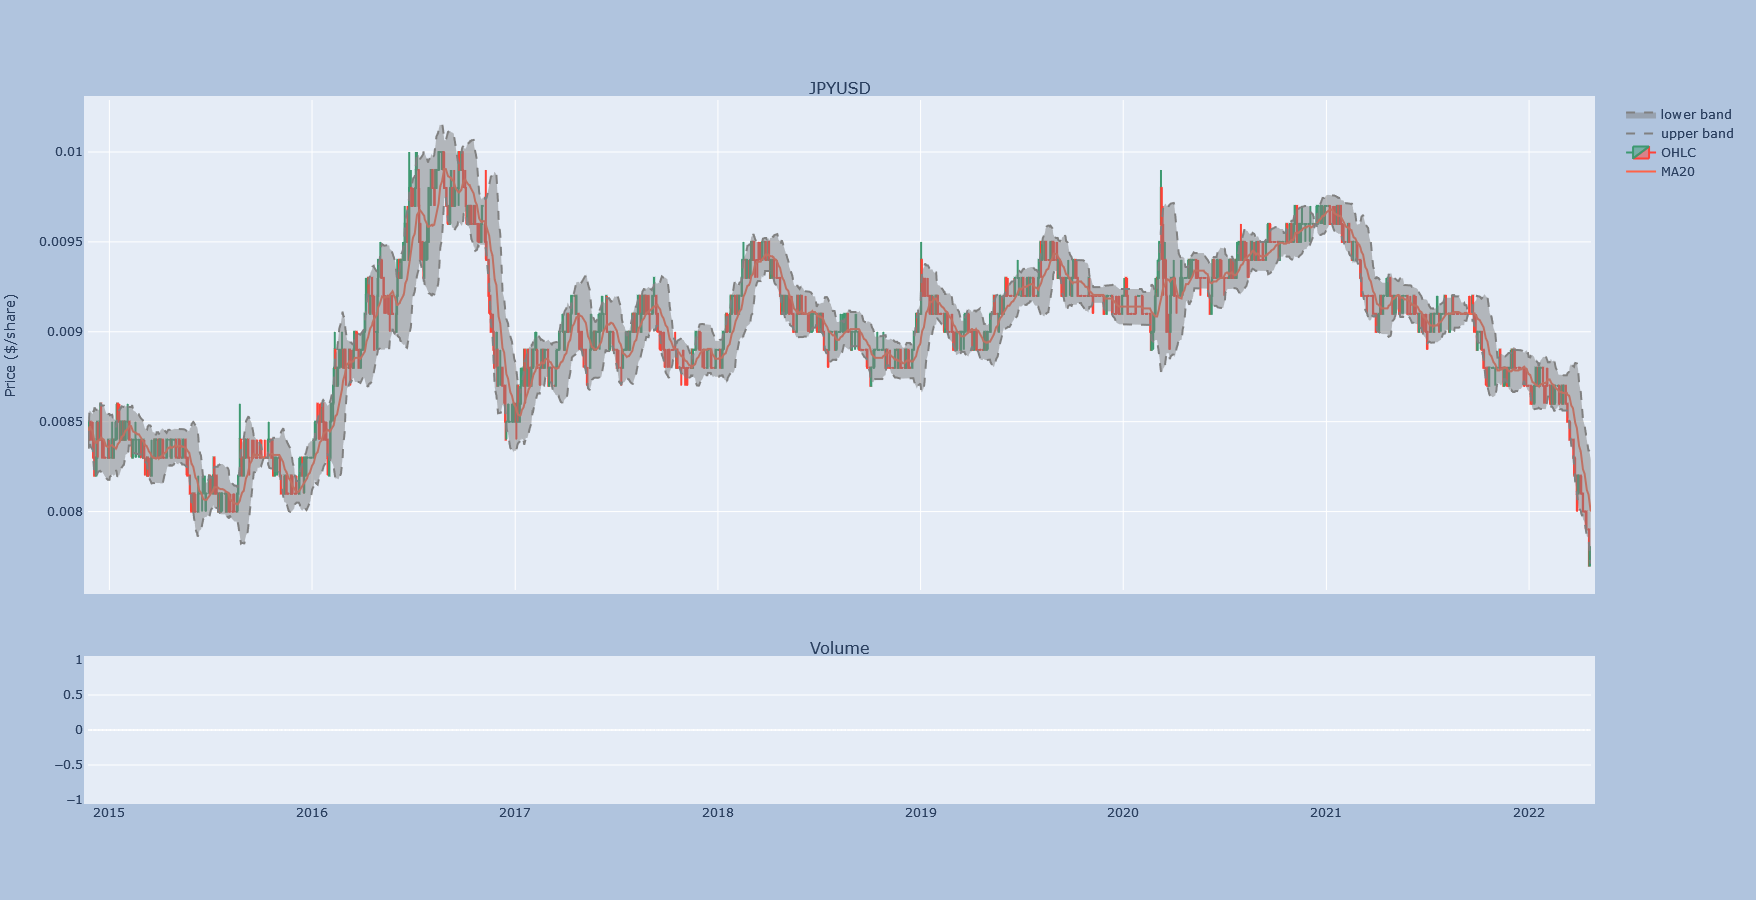

In [24]:
# Country Currency 2

# Set moving Average and STD
forex_2['MA20'] = forex_2['close'].rolling(window=20, min_periods=0).mean()
forex_2['std'] = forex_2['close'].rolling(window=20, min_periods=0).std(ddof = 0)

# set fig
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_2, 'Volume'), 
               row_width=[0.2, 0.7])



# Volume
fig.add_trace(go.Bar(x=forex_2.index, y=forex_2['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
fig.add_trace(go.Scatter(x=forex_2.index, y=forex_2["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
fig.add_trace(go.Candlestick(x=forex_2.index, open=forex_2["open"], high=forex_2["high"],
                low=forex_2["low"], close=forex_2["close"], name="OHLC"), 
                row=1, col=1)


# Create a Bollinger Band

# Upper Bound
fig.add_trace(go.Scatter(x=forex_2.index, 
                         y=forex_2["MA20"] + (forex_2['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x=forex_2.index, 
                         y=forex_2["MA20"] - (forex_2['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 1, col = 1)


fig.update_layout(
#    title= f'{forex_pair_2} Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=900,
    height=900,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='LightSteelBlue'
    
)
# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()



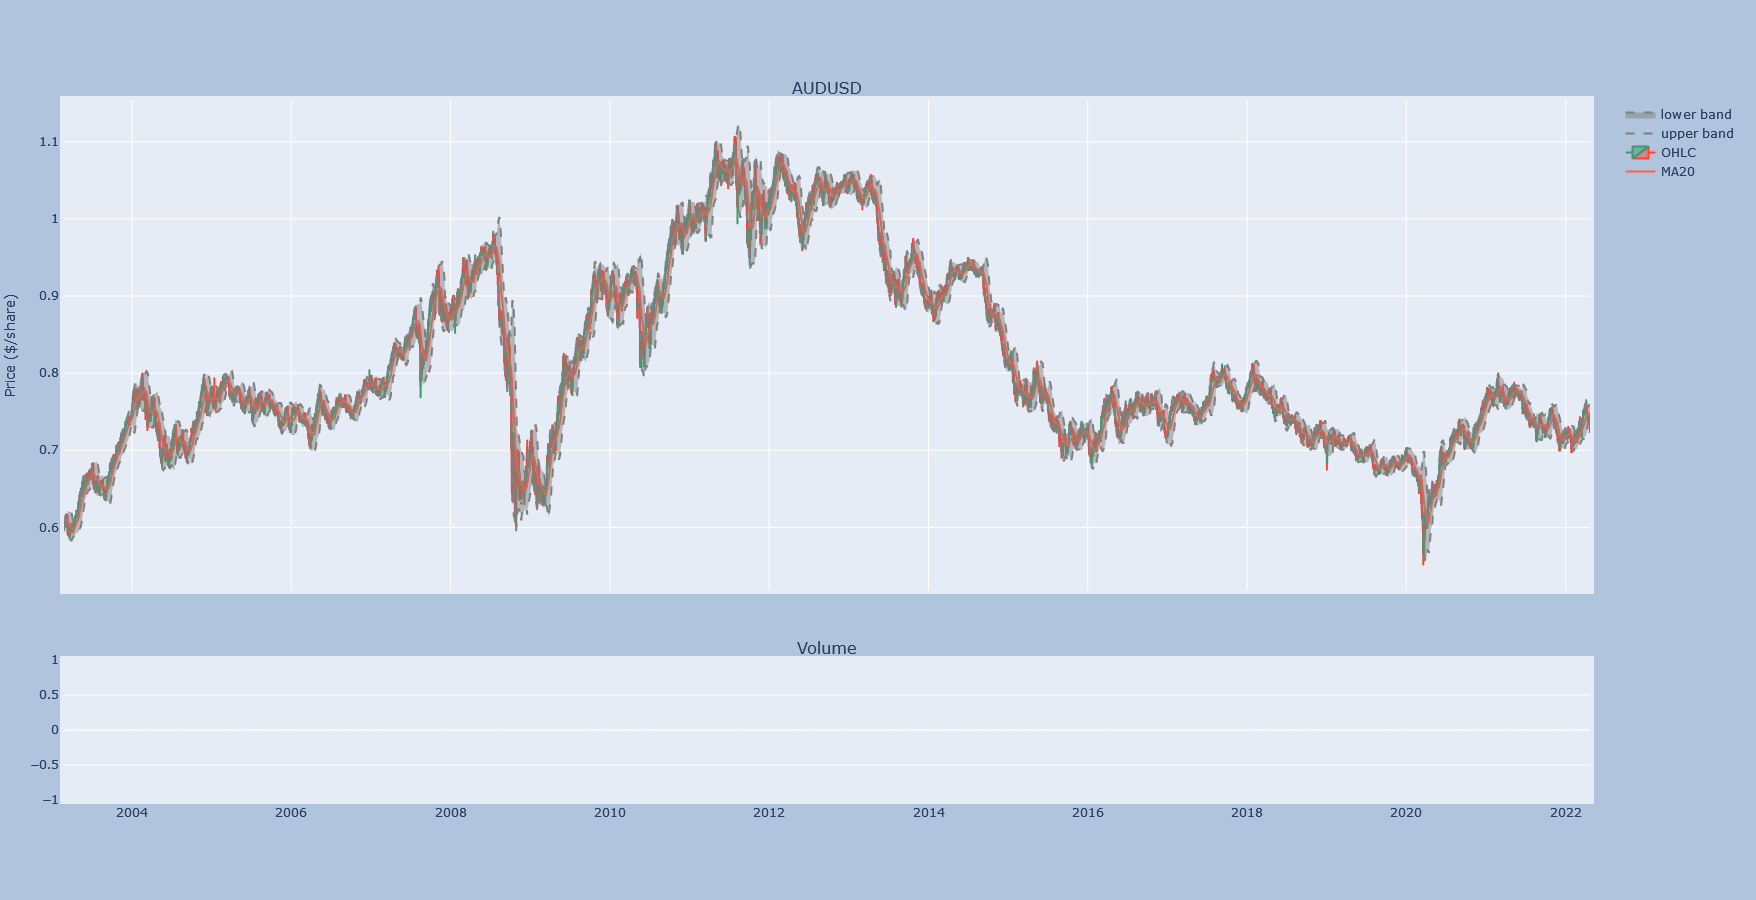

In [25]:
# Country Currency 3

# Set moving Average and STD
forex_3['MA20'] = forex_3['close'].rolling(window=20, min_periods=0).mean()
forex_3['std'] = forex_3['close'].rolling(window=20, min_periods=0).std(ddof = 0)

# set fig
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_3, 'Volume'), 
               row_width=[0.2, 0.7])



# Volume
fig.add_trace(go.Bar(x=forex_3.index, y=forex_3['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
fig.add_trace(go.Scatter(x=forex_3.index, y=forex_3["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
fig.add_trace(go.Candlestick(x=forex_3.index, open=forex_3["open"], high=forex_3["high"],
                low=forex_3["low"], close=forex_3["close"], name="OHLC"), 
                row=1, col=1)


# Create a Bollinger Band

# Upper Bound
fig.add_trace(go.Scatter(x=forex_3.index, 
                         y=forex_3["MA20"] + (forex_3['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x=forex_3.index, 
                         y=forex_3["MA20"] - (forex_3['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 1, col = 1)


fig.update_layout(
#    title= f'{forex_pair_2} Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=900,
    height=900,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='LightSteelBlue'
    
)
# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()

# Foreign Exchange Currency Converter

In [26]:
# Only input the amount of currency to be converted. 
 
    
    # switch ti and  from currency usd is from
    # do this for pair 2 and paie 3 

currency, amount = CurrencyRates(), int(input("Enter the Amount: "))
from_currency, to_currency = "USD", pair.upper()


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

Enter the Amount:  1000


USD To EUR 1000
Conversion Amount:  924.470740501063


In [27]:
# Country 2 currency conversion

currency, amount = CurrencyRates(), int(input("Enter the Amount: "))
from_currency, to_currency = "USD", pair_2.upper()


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

Enter the Amount:  1000


USD To JPY 1000
Conversion Amount:  128344.2729037626


In [28]:
# country 3 currency conversion

currency_3, amount_3 = CurrencyRates(), int(input("Enter the Amount: "))
from_currency, to_currency = "USD", pair_3.upper()


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

Enter the Amount:  1000


USD To AUD 1000
Conversion Amount:  1369.6958491263752


# Monte Carlo Simulation on the returns of the inputed currency

### Plot the Simulated Outcomes for the inputed amount of days


### Plot the Simulated Daily Returns Trajectory for country 1 over the inputed amount of days

In [ ]:
# Country Currency 1 Monte Carlo 

In [ ]:
# Country Currency 2 Monte Carlo 

In [ ]:
# Country Currency 3 Monte Carlo 

# Monte Carlo Sim

In [29]:
time_series = pdr.av.time_series.AVTimeSeriesReader(f'{forex_pair}', api_key='alpha_vantage_api_key')
forex = time_series.read()
forex.index = pd.to_datetime(forex.index, format='%Y-%m-%d')
ticker_data = pd.concat([forex], axis=1, keys=[f'{forex_pair}'])

# Configure a Monte Carlo simulation to forecast one year daily returns
forex_montecarlo = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = 50,
    num_trading_days = 252,
)

In [30]:
# Run Monte Carlo simulations to forecast one year daily returns
forex_montecarlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


0         1         2         3         4         5         6   \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.992726  0.997469  0.989066  0.996366  1.009093  0.995288  1.007897   
2    0.988113  0.996101  0.990385  1.005119  1.005980  0.995004  1.004459   
3    0.991768  0.996238  0.989967  1.009050  1.003304  0.995243  1.008146   
4    0.990576  0.990920  0.986038  1.018243  1.009674  0.995949  1.015103   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.952918  1.059243  0.873882  1.093550  1.030758  1.000117  0.839793   
249  0.945368  1.061149  0.876505  1.101979  1.032005  1.000940  0.840644   
250  0.944057  1.060113  0.873130  1.104310  1.034508  0.999076  0.845457   
251  0.942012  1.060635  0.868465  1.108002  1.021128  1.004481  0.838700   
252  0.946128  1.062927  0.868871  1.100742  1.019579  1.001059  0.839403   

           7         8         9   ...        40        41        42  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.990205  0.989583  0.998948  ...  0.998929  1.007702  0.991279   
2    0.995931  0.993754  0.997990  ...  0.998904  1.004403  0.986412   
3    0.993017  1.007877  0.991258  ...  0.998787  1.008159  0.985910   
4    1.001997  1.003820  0.991041  ...  1.004417  1.014712  0.987599   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.874266  1.074822  0.988976  ...  1.263273  0.970032  0.995100   
249  0.874757  1.067463  0.996567  ...  1.256464  0.968304  0.985909   
250  0.870757  1.063496  1.003753  ...  1.251307  0.970123  0.985305   
251  0.886795  1.049944  1.012892  ...  1.250899  0.981061  0.975841   
252  0.886028  1.052695  1.021376  ...  1.253647  0.983058  0.969816   

           43        44        45        46        47        48        49  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.003550  0.991926  0.994345  0.998533  1.008028  1.001262  0.995861  
2    1.012123  0.995537  0.987306  0.995829  1.014215  0.997863  0.994171  
3    1.018835  0.988647  0.982613  0.996259  1.008019  1.002251  0.991333  
4    1.020647  0.978616  0.986077  0.990695  1.010268  0.997292  0.984641  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.027494  0.998488  1.245326  0.939882  0.995221  0.910031  0.915666  
249  1.008980  1.005720  1.253067  0.940738  1.000422  0.918831  0.910954  
250  0.998231  1.008128  1.236546  0.947557  1.005359  0.920095  0.905803  
251  0.998573  1.008310  1.228372  0.942180  1.008950  0.931379  0.902750  
252  0.994665  1.016915  1.215321  0.945530  1.021350  0.930127  0.908906  

[253 rows x 50 columns]

### Plot the Simulated Outcomes for the inputed amount of time

In [31]:
# Plot simulation outcomes
line_plot = forex_montecarlo.plot_simulation()

TypeError: line() got an unexpected keyword argument 'legend'

### Plot the Simulated Daily Returns Trajectory for AAPL over the Next Year (252 Trading Days)

In [32]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(forex_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_montecarlo.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  0.999508  0.998938  0.989066  1.012601
2  0.998815  0.997716  0.981670  1.019790
3  1.000157  1.000808  0.979361  1.018835
4  1.001070  1.002331  0.972863  1.024128

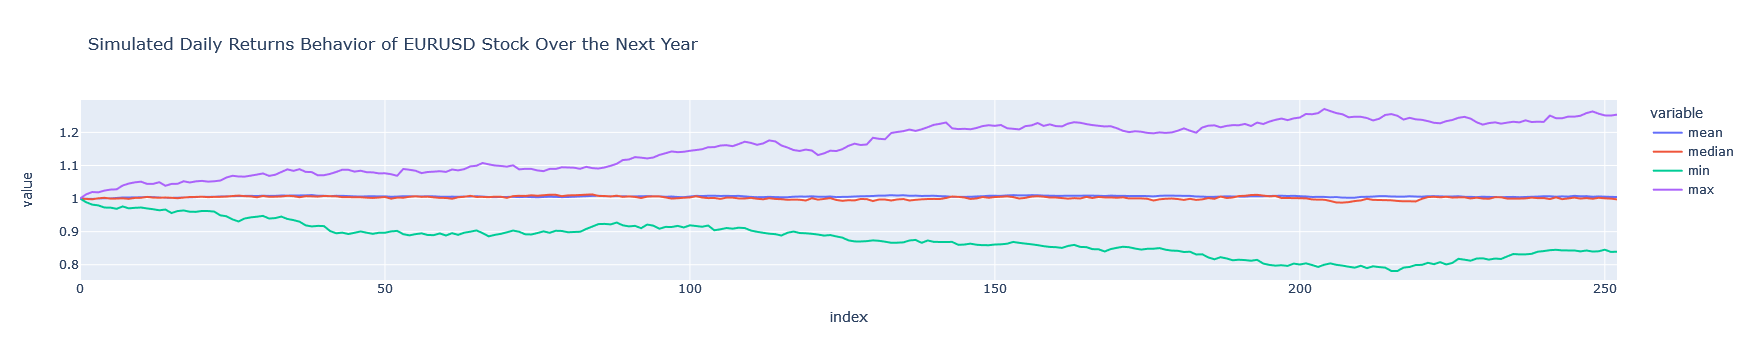

In [33]:
# Use the `plot` function to visually analyze the trajectory of first countries currency returns on a 252 trading day simulation
df_simulated_returns.plot(title=f"Simulated Daily Returns Behavior of {forex_pair} Stock Over the Next Year")

### Calculate the Simulated Profits/Losses of inputted amount in first countries currency over the Next imputted amount of Trading Days

In [34]:
# Set initial investment
initial_investment = amount

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample dat
cumulative_pnl.head()

mean       median          min          max
0  1000.000000  1000.000000  1000.000000  1000.000000
1   999.507695   998.938293   989.065626  1012.601100
2   998.814884   997.716059   981.669767  1019.789566
3  1000.156520  1000.808148   979.360661  1018.834895
4  1001.070015  1002.330755   972.863341  1024.127620

### Plot the Simulated Profits/Losses of inputted amount in first countries currency Over the Next inputted amount of Trading Days

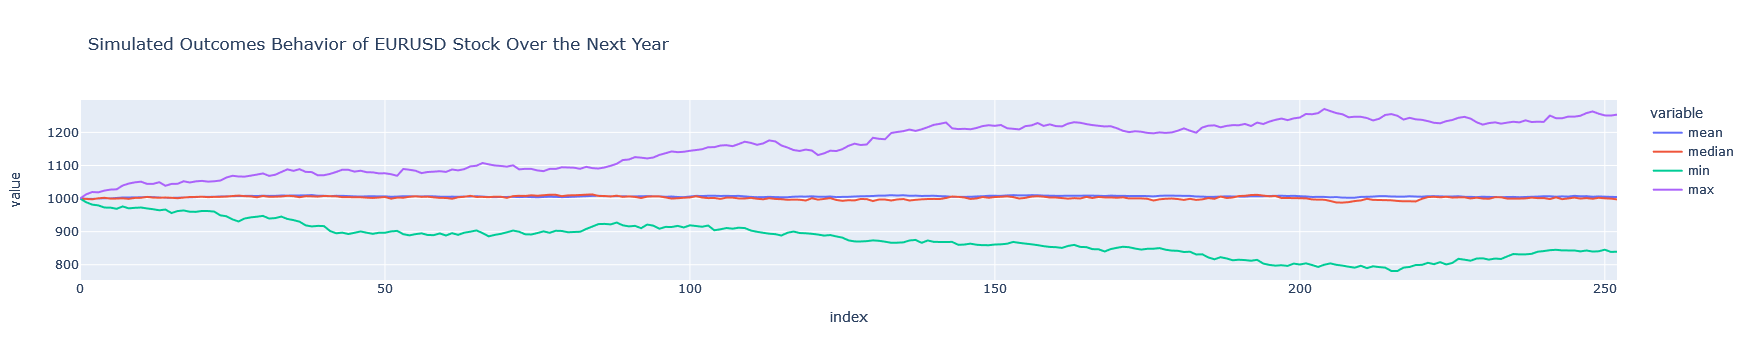

In [35]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {forex_pair} Stock Over the Next Year")

### Calculate the range of the possible outcomes of our inputted amount in first countries currency

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = forex_montecarlo.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           50.000000
mean             1.004621
std              0.083994
min              0.839403
25%              0.956905
50%              0.997595
75%              1.030239
max              1.253647
95% CI Lower     0.869732
95% CI Upper     1.205495
Name: 252, dtype: float64


In [39]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our inputted amount in first countries currency
ci_lower = round(tbl[8]*amount,2)
ci_upper = round(tbl[9]*amount,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${amount} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1000 in the portfolio over the next year will end within in the range of $869.73 and $1205.5.


# Map 

In [ ]:
# Read in data
airports = pd.read_csv(
    Path("airports.csv")
).dropna()
airports

In [ ]:
name = airports['Name'].astype('string')
city = airports[' City'].astype('string')
country = airports[' Country'].astype('string')
latitude = airports[' Latitude'].astype('float')
longitude = airports[' Longitude'].astype('float')

#airports_df = pd.DataFrame(columns=['Name', 'City', 'Country', 'Latitude', 'Longitude'])
#airports_df

airports_df = pd.DataFrame(columns=airports[' City'].unique().astype('str')).transpose()
#airports_df = pd.DataFrame(columns=['City'])
airports_df

# airports_df = pd.DataFrame(columns=[airports['Name'].astype('string'), airports[' City'].astype('string'), airports[' Country'].astype('string'), airports[' Latitude'].astype('float'), airports[' Longitude'].astype('float')])
# airports_df = airports_df.transpose()
# airports_df

# cities = airports[' City'].unique()
# cities

#.drop(columns=[' IATA', ' ICAO', ' Altitude', ' Timezone', ' DST', ' Type', ' Source'], inplace=True) 

cities = airports.astype('string').reset_index().groupby(' Name', ' City', ' Country', ' Latitude', ' Longitude')
cities

In [ ]:
# # Slice and plot data by name
# map_1 = px.scatter_mapbox(
#     airports,
#     lat=' Latitude',
#     lon=' Longitude',
#     color="Name"
# )
# map_1.show()

# Monte Carlo Function

Needs work. need to fix the plotting

## Variables

In [ ]:
time_series = pdr.av.time_series.AVTimeSeriesReader(f'{forex_pair}', api_key='alpha_vantage_api_key')
forex = time_series.read()
forex.index = pd.to_datetime(forex.index, format='%Y-%m-%d')
ticker_data = pd.concat([forex], axis=1, keys=[f'{forex_pair}'])
simulated_returns_data = {
    "mean": list(forex_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_montecarlo.simulated_return.max(axis=1))
}
df_simulated_returns = pd.DataFrame(simulated_returns_data)
initial_investment = amount
cumulative_pnl = initial_investment * df_simulated_returns
tbl = forex_montecarlo.summarize_cumulative_return()
ci_lower = round(tbl[8]*amount,2)
ci_upper = round(tbl[9]*amount,2)

## Function

In [ ]:
# Configuring a Monte Carlo simulation to forecast x years cumulative returns
def MC_Simulation(number_of_months):
    forex_montecarlo = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = 50,
    num_trading_days = 30 * number_of_months
)
# Run Monte Carlo simulations to forecast one year daily returns
    forex_montecarlo.calc_cumulative_return()
# Plot simulation outcomes
    forex_montecarlo.plot_simulation()
# Use the `plot` function to visually analyze the trajectory of first countries currency returns on a 252 trading day simulation
    df_simulated_returns.plot(title=f"Simulated Daily Returns Behavior of {forex_pair} Stock Over the Next Year")
# Use the 'plot' function to create a chart of the simulated profits/losses
    cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {forex_pair} Stock Over the Next Year")
# Print results
    print(f"There is a 95% chance that an initial investment of ${amount} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")
    print()
    return


In [ ]:
MC_Simulation(12)